In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

%matplotlib inline
pd.options.mode.chained_assignment = None

c:\Users\dms\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Загружаем данные
df = pd.read_csv('heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### Обработка данных

In [4]:
# повторяющих строк нет
df.duplicated().sum()

0

In [5]:
# количество пустых значений по столбцам
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Из датасета видно общее количество наблюдений - 920.
Имеется два столбца (slope, ca, thal) где присутствует большое количество пустых значений.  
Столбец id - просто порядковый номер, не интересен для анализа.    
Также не интересен столбец dataset, просто информация о месте сбора данных.

In [6]:
# удаляем ненужные столбцы
df = df.drop(['id', 'dataset', 'ca', 'thal', 'slope'], axis=1)

#### Работа со столбцами с пустыми значениями

In [7]:
# количество пустых значений по столбцам
df.isnull().sum()

age          0
sex          0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
num          0
dtype: int64

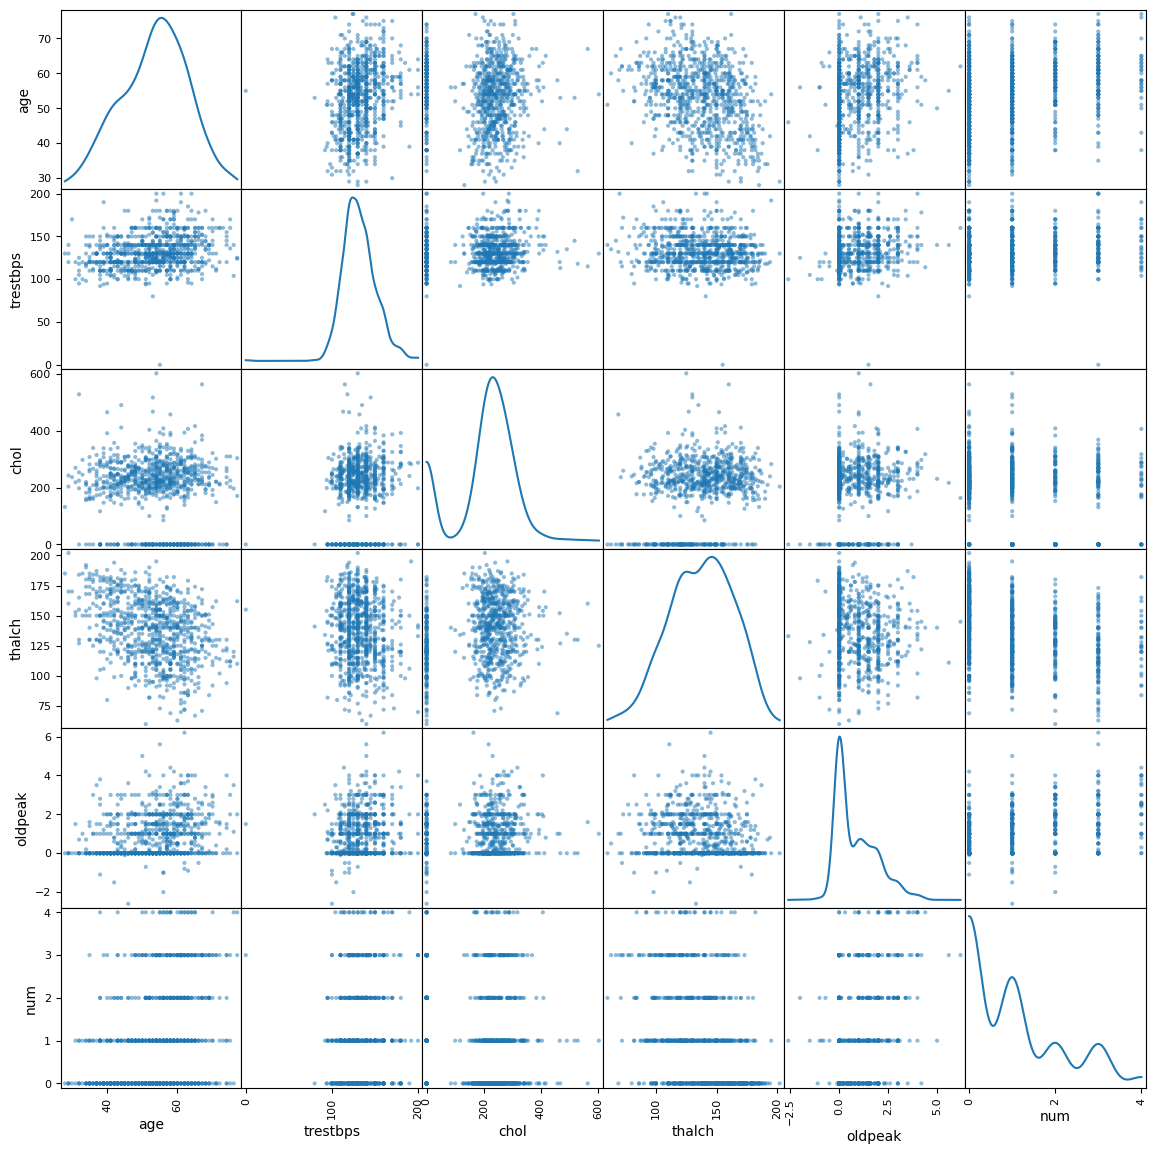

In [8]:
# построим диаграмму рассеяния
scatter_matrix(df, diagonal='kde', figsize=(14, 14));

На диаграмме видно что на всех парах корреляция слабая.

Также на диаграмме можно увидеть что есть явные выбросы значений в признаках trestbps, oldpeak

In [9]:
# удаляем выбросы
df = df.loc[df.trestbps != 0]
df = df.loc[(df.oldpeak >= 0) & (df.oldpeak <= 5)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...
913,62,Male,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,1
914,46,Male,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,2
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2


In [10]:
# проверяем количество пустых значений по столбцам
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     4
chol        27
fbs         76
restecg      2
thalch       1
exang        1
oldpeak      0
num          0
dtype: int64

In [11]:
# удаляем строки (их немного) со значением nan в столбцах  trestbps, restecg, thalch, exang
df = df.dropna(subset=['restecg', 'trestbps', 'thalch', 'exang'])
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol        27
fbs         75
restecg      0
thalch       0
exang        0
oldpeak      0
num          0
dtype: int64

In [12]:
# Заполняем пустые значения в столбцах chol, fbs
# Заполнять будем модой по группе из трех категориальных столбцов (sex, cp, restecg)
gr = df.groupby(['sex', 'cp', 'restecg'])
print(gr.size())

sex     cp               restecg         
Female  asymptomatic     lv hypertrophy       21
                         normal               38
                         st-t abnormality     10
        atypical angina  lv hypertrophy        9
                         normal               42
                         st-t abnormality      8
        non-anginal      lv hypertrophy       15
                         normal               31
                         st-t abnormality      7
        typical angina   lv hypertrophy        1
                         normal                7
                         st-t abnormality      2
Male    asymptomatic     lv hypertrophy       75
                         normal              229
                         st-t abnormality     80
        atypical angina  lv hypertrophy       14
                         normal               79
                         st-t abnormality     14
        non-anginal      lv hypertrophy       30
                         no

In [13]:
df.chol = gr.chol.transform(lambda x: x.fillna(x.mode()[0]) if x.count() != 0 else np.NaN)
df.fbs = gr.fbs.transform(lambda x: x.fillna(x.mode()[0]) if x.count() != 0 else np.NaN)
df = df.dropna(subset=['chol', 'fbs'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...
913,62,Male,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,1
914,46,Male,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,2
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2


In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

### Дамми-кодирование

In [15]:
cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']
for col in cols:
    new_dum_cols = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, new_dum_cols], axis=1)
df = df.drop(columns=cols, axis=1)
df

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True
0,63,145.0,233.0,150.0,2.3,0,0,1,0,0,0,1,0,1,1,0,0,1,0
1,67,160.0,286.0,108.0,1.5,2,0,1,1,0,0,0,1,0,1,0,0,0,1
2,67,120.0,229.0,129.0,2.6,1,0,1,1,0,0,0,1,0,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0,0,1,0,0,1,0,1,0,0,1,0,1,0
4,41,130.0,204.0,172.0,1.4,0,1,0,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,158.0,170.0,138.0,0.0,1,0,1,1,0,0,0,1,0,0,0,1,0,1
914,46,134.0,310.0,126.0,0.0,2,0,1,1,0,0,0,1,0,0,1,0,1,0
915,54,127.0,333.0,154.0,0.0,1,1,0,1,0,0,0,0,1,0,0,1,1,0
917,55,122.0,223.0,100.0,0.0,2,0,1,1,0,0,0,0,1,0,0,1,1,0


Будем рассматривать задачу "предсказание возникновения сердечно-сосудистых заболеваний" как задачу бинарной классификации, т.е. 1 - у пациента полезнь сердца, 0 - нет сердечных заболеваний.

In [16]:
# приведем целевой признак к двум значениям
df['num'].replace({2: 1, 3: 1, 4: 1}, inplace =True)

### Подготовка данных для обучения

In [17]:
X = df.drop(['num'], axis=1)
y = df['num']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
y_train.value_counts()

1    356
0    313
Name: num, dtype: int64

Данные хорошо сбалансированны.

### Обучение

In [20]:
# 1 модель
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        73
           1       0.81      0.74      0.77        95

    accuracy                           0.76       168
   macro avg       0.75      0.76      0.75       168
weighted avg       0.76      0.76      0.76       168



In [21]:
# 2 модель
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        79
           1       0.83      0.89      0.86        89

    accuracy                           0.85       168
   macro avg       0.85      0.84      0.84       168
weighted avg       0.85      0.85      0.84       168



In [117]:
# 3 модель
rfc = RandomForestClassifier(criterion='entropy', max_depth=11, max_features=2, min_samples_split=9)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        82
           1       0.83      0.92      0.87        86

    accuracy                           0.86       168
   macro avg       0.87      0.86      0.86       168
weighted avg       0.87      0.86      0.86       168



In [23]:
# поиск гиперпараметров
# grfc = RandomForestClassifier(criterion='entropy', max_depth=10)
# params = {'max_features': range(10), 'min_samples_split': range(10)}
# grid = GridSearchCV(grfc, params, cv=5)
# grid.fit(X_train, y_train)
# grid.best_params_